In [1]:
# Analyse monthly sur 7 ans
# Analyse weekly sur 4 ans
# Analyse daily sur 6 mois

In [71]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf
import plotly.graph_objs as go


In [3]:
import stocks
start = "2000-01-01"
end = "2021-02-28"
ticker = "MSFT"          # Amazon
#ticker = "NTDOY"        # Nintendo
prices = stocks.GrabPrices(ticker, start, end)

In [4]:
prices

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,59.312500,56.000000,58.687500,58.281250,53228400.0,37.017384
2000-01-04,58.562500,56.125000,56.781250,56.312500,54119000.0,35.766914
2000-01-05,58.187500,54.687500,55.562500,56.906250,64059600.0,36.144032
2000-01-06,56.937500,54.187500,56.093750,55.000000,54976600.0,34.933285
2000-01-07,56.125000,53.656250,54.312500,55.718750,62013600.0,35.389793
...,...,...,...,...,...,...
2021-02-22,237.929993,232.399994,237.419998,234.509995,36446900.0,234.509995
2021-02-23,234.830002,228.729996,230.330002,233.270004,30228700.0,233.270004
2021-02-24,235.199997,229.000000,230.009995,234.550003,26339700.0,234.550003


In [5]:
prices.shape

(5322, 6)

In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5322 entries, 2000-01-03 to 2021-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5322 non-null   float64
 1   Low        5322 non-null   float64
 2   Open       5322 non-null   float64
 3   Close      5322 non-null   float64
 4   Volume     5322 non-null   float64
 5   Adj Close  5322 non-null   float64
dtypes: float64(6)
memory usage: 291.0 KB


In [7]:
prices.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
#mpf.plot(prices,volume=True, type='candle', tight_layout=True,
#         figratio=(20,12),
#         title='AMZN 2020',
#         mav=(30,100), 
#         style='yahoo')        

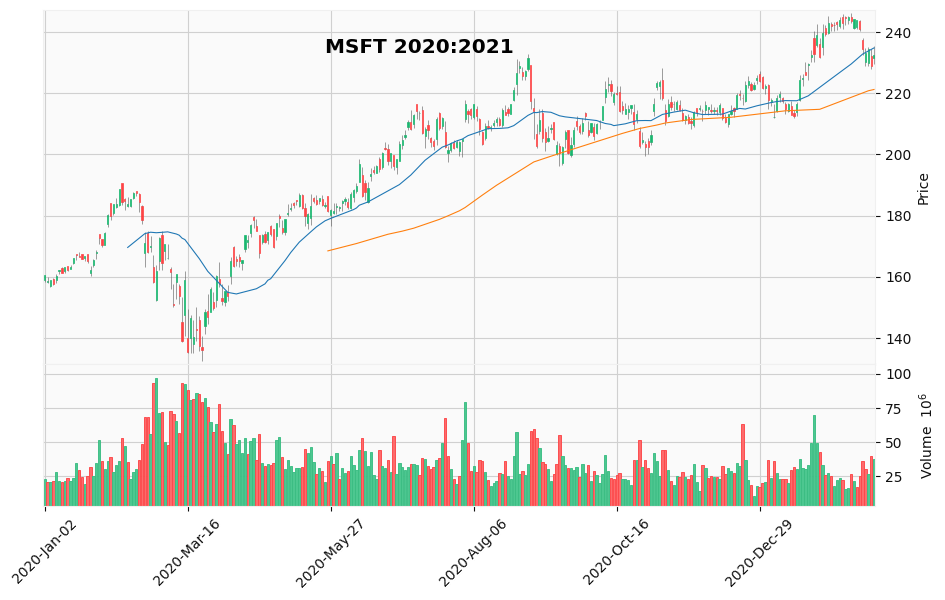

In [9]:
rangestart = '2020'
rangeend   = '2021'
mpf.plot(prices.loc[rangestart:rangeend],volume=True, type='candle', tight_layout=True,
         figratio=(20,12),
         title=ticker + ' '+ rangestart + ':' + rangeend,
         mav=(30,100), 
         style='yahoo'
        )

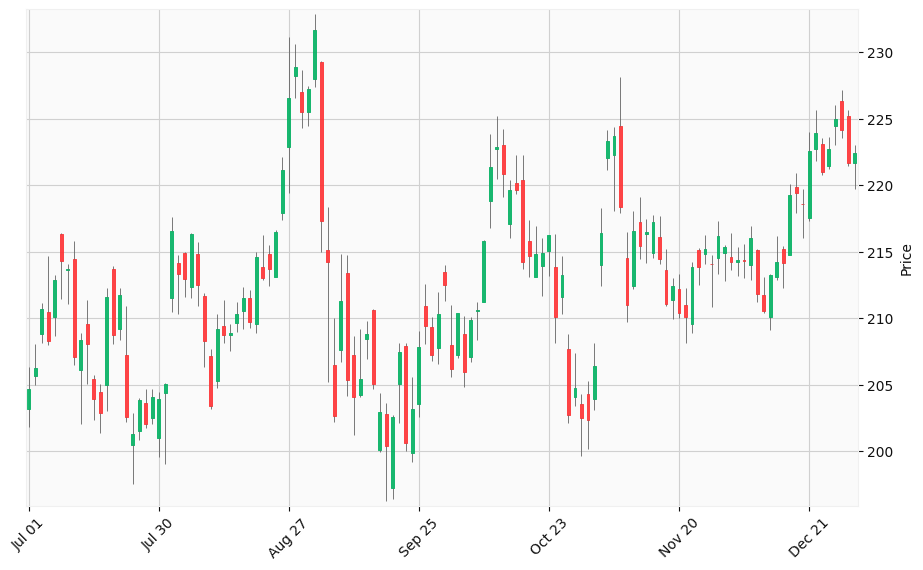

In [94]:
import stocks
start = "2000-01-01"
end = "2021-02-28"
ticker = "MSFT"          # Amazon
#ticker = "NTDOY"        # Nintendo
prices = stocks.GrabPrices(ticker, start, end)

ss = prices.loc['2020-07':'2020-12']
mpf.plot(ss, type='candle', tight_layout=True,
         figratio=(25,15), style='yahoo')

In [11]:
ss.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [12]:
ss['High'].max()

232.86000061035156

In [13]:
daterange = ss.loc['2020-07-01':'2020-07-30']
high = daterange['High'].max()
high
#ss[ss['High'].gt(225)]

216.3800048828125

In [14]:
daterange = ss.loc['2020-07-01':'2020-07-30'].round(0)
#daterange[daterange['High'].gt(215)]
daterange[daterange['Close'].eq(daterange['High'])]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-06,211.0,208.0,209.0,211.0,31897600.0,209.0
2020-07-08,213.0,209.0,210.0,213.0,33600000.0,211.0
2020-07-10,214.0,211.0,214.0,214.0,26177600.0,212.0
2020-07-20,212.0,203.0,205.0,212.0,36884800.0,210.0
2020-07-22,212.0,208.0,209.0,212.0,49605700.0,210.0
2020-07-27,204.0,201.0,201.0,204.0,30160900.0,202.0
2020-07-30,204.0,200.0,201.0,204.0,25079600.0,202.0


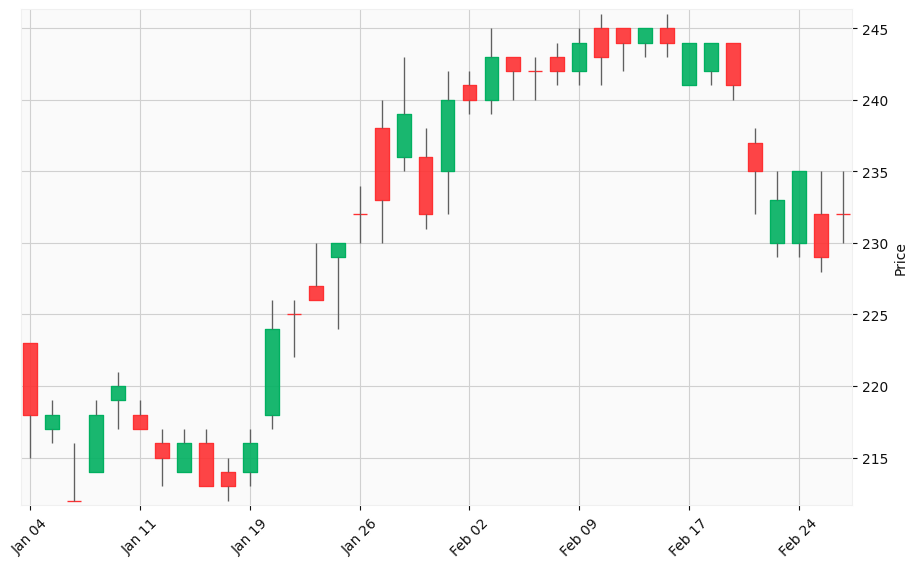

In [66]:
p = prices.round(0)
hammer = p['Close'].eq(p['High'])
prices['hammer'] = hammer
mpf.plot(prices.loc['2021-01':'2021-02'].round(0), type='candle', tight_layout=True,
         figratio=(25,15), style='yahoo')

In [64]:
prices[prices['hammer'] == True].round(1).tail(5)

,High,Low,Open,Close,Volume,Adj Close,hammer
Date,,,,,,,
2021-01-25,229.8,224.2,229.1,229.5,33152100.0,229.0,True
2021-02-12,245.3,242.7,243.9,245.0,16552000.0,244.4,True
2021-02-17,244.3,240.9,241.3,244.2,21653500.0,244.2,True
2021-02-18,243.9,240.9,241.8,243.8,16925600.0,243.8,True
2021-02-24,235.2,229.0,230.0,234.6,26339700.0,234.6,True


In [65]:
prices.round(0).tail(20)

,High,Low,Open,Close,Volume,Adj Close,hammer
Date,,,,,,,
2021-01-29,238.0,231.0,236.0,232.0,42468900.0,231.0,False
2021-02-01,242.0,232.0,235.0,240.0,33314200.0,239.0,False
2021-02-02,242.0,239.0,241.0,240.0,25916300.0,239.0,False
2021-02-03,245.0,239.0,240.0,243.0,27158100.0,242.0,False
2021-02-04,243.0,240.0,243.0,242.0,25296100.0,241.0,False
2021-02-05,243.0,240.0,242.0,242.0,18043900.0,242.0,False
2021-02-08,244.0,241.0,243.0,242.0,22211900.0,242.0,False
2021-02-09,245.0,241.0,242.0,244.0,23565000.0,243.0,False
2021-02-10,246.0,241.0,245.0,243.0,22186700.0,242.0,False


# Multiplot trial

In [80]:
p1 = prices.copy()
#p1.index
first_trace = go.Candlestick(
    x     = p1.index,
    open  = p1.Open,
    high  = p1.High,
    low   = p1.Low,
    close = p1.Close )

In [91]:
p2 = prices.copy()
p2['Newcol'] = p2.Close-50

second_trace = go.Scatter(x=p2.index, y=p2.Newcol, mode='lines', name='Line')


In [92]:
data = [first_trace, second_trace]
layout = go.Layout(
    xaxis=dict(type='date'),
    yaxis=dict(title='Ticks')
)
fig = go.Figure(data=data, layout=layout)
fig.show()

# Derek Banas Crash Course

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
